<a href="https://colab.research.google.com/github/BrazilianKing/Sales-Predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edmar Dos Santos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import set_config
set_config(display = 'diagram')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/excel downloads/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df[df.isna().any(axis=1)].shape

(3873, 12)

In [8]:
df.duplicated().sum()

0

#Checking value counts for all objetcs then Cordinal encoding each one of them

In [9]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
replacement_dictionary1 = {'Low Fat':0, 'LF':0, 'low fat':0, 'Regular':1, 'reg':1}
df['Item_Fat_Content'].replace(replacement_dictionary1, inplace=True)
df['Item_Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int64

In [11]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
replacement_dictionary2 = {'Small':0, 'Medium':1, 'High':2}
df['Outlet_Size'].replace(replacement_dictionary2, inplace=True)
df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [13]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [14]:
replacement_dictionary3 = {'Tier 3':0, 'Tier 2':1, 'Tier 1':2}
df['Outlet_Location_Type'].replace(replacement_dictionary3, inplace=True)
df['Outlet_Location_Type']

0       2
1       0
2       2
3       0
4       0
       ..
8518    0
8519    1
8520    1
8521    0
8522    2
Name: Outlet_Location_Type, Length: 8523, dtype: int64

Identify the features (X) and target (y)

In [15]:
y = df['Item_Outlet_Sales']

X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier'])

# Finding missing data

In [16]:
print(df.isna().sum().sum(), 'missing values')

3873 missing values


In [17]:
print(df.isna().sum(), 'missing values')

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 missing values


#Checking for duplicates

Performing Train/Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Creatng a preprocessing object to prepare the dataset for Machine Learning

In [19]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [20]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# One Hot Encoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)

In [21]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [22]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [23]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

In [24]:
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f93b6e9ce80>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f93b6ead0d0>)])

In [25]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f93b6e9ce80>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f93b6ead0d0>)])

In [26]:
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [27]:
X_train_proc[:5]

array([[ 0.81724868, -0.7403206 , -0.71277507,  1.82810922,  1.32784893,
         0.40778536, -1.08494779,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225,  0.60336888,  1.32784893,
         0.40778536, -1.08494779,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-0.13151196,  1.35076614,  1.81331864,  0.24454056,  0.13618724,
         0.40778536,  1.38477667,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-1.1692189 , -0.7403206 , -1.00493112, -0.95259072,  0.73201809,
        -1.29162953,  0.14991444,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.52881915, -0.7403206 , -0.96548425, -0.33646004,  0.49368575,
         0.        ,  0.14991444,  0.        ,  1.        ,  0.        ,
         0.        ]])

In [28]:
df = pd.DataFrame(X_train_proc)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.817249,-0.740321,-0.712775,1.828109,1.327849,0.407785,-1.084948,0.0,0.0,1.0,0.0
1,0.556340,1.350766,-1.291052,0.603369,1.327849,0.407785,-1.084948,0.0,0.0,1.0,0.0
2,-0.131512,1.350766,1.813319,0.244541,0.136187,0.407785,1.384777,0.0,1.0,0.0,0.0
3,-1.169219,-0.740321,-1.004931,-0.952591,0.732018,-1.291630,0.149914,0.0,1.0,0.0,0.0
4,1.528819,-0.740321,-0.965484,-0.336460,0.493686,0.000000,0.149914,0.0,1.0,0.0,0.0


# Linear regression model to predict sales.

Importing Models

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

#Running your first model

Importing and instantiating the model

In [30]:
reg = LinearRegression()

Creating a model pipeline

In [31]:
reg_pipe = make_pipeline(preprocessor,reg)

Training the model on the training data

In [32]:
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f93b6e9ce80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f93b6ead0d0>)])),
                ('linearregression', LinearRegression())])

Creating model predictions for training and testing data

In [33]:
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

Making a predictions using the testing data

In [34]:
prediction_df = X_test.copy()
prediction_df['True Median Price'] = y_test
prediction_df['Predicted Median Price'] = test_pred
prediction_df['Error'] = test_pred - y_test
prediction_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,True Median Price,Predicted Median Price,Error
7503,14.300,0,0.026300,79.4302,1987,2.0,0,Supermarket Type1,1743.0644,1345.677252,-397.387148
2957,7.930,0,0.071136,42.7086,1997,0.0,2,Supermarket Type1,356.8688,746.775963,389.907163
7031,14.500,1,0.041313,42.0454,1999,1.0,2,Supermarket Type1,377.5086,811.523967,434.015367
1084,NaN,1,0.044767,173.7054,1985,1.0,0,Supermarket Type3,5778.4782,4277.334209,-1501.143991
856,10.195,1,0.012456,197.5110,2004,0.0,1,Supermarket Type1,2356.9320,3272.540793,915.608793


## Evaluate the performance of your model based on r^2.

In [35]:
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f'Training R2: {train_r2}')
print(f'Testing R2: {test_r2}')

Training R2: 0.559822652647268
Testing R2: 0.5683607931341266


## Evaluate the performance of your model based on rmse.

In [36]:
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_MSE}')
print(f'Testing MSE: {test_MSE}')

Training MSE: 1302685.3616264113
Testing MSE: 1190882.7682698232


In [37]:
# Using sklearn to find the MSE and including the square root step

train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'Training RMSE: {train_RMSE}')
print(f'Testing RMSE: {test_RMSE}')

Training RMSE: 1141.3524265652618
Testing RMSE: 1091.2757526261744


# Regression tree model to predict sales.

In [62]:
# Importing DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

In [39]:
# Making an instance of the model

dec_tree = DecisionTreeRegressor(random_state = 42)

In [40]:
# Creating pipeline

dec_pipe = make_pipeline(preprocessor,dec_tree)

In [41]:
# Fit the model using your training data

dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f93b6e9ce80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f93b6ead0d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

Make Predictions

In [42]:
train_preds = dec_pipe.predict(X_train)
test_preds = dec_pipe.predict(X_test)

Compare the performance of your model based on r^2.

In [43]:
# Evaluate the model
# r^2

train_score = dec_pipe.score(X_train, y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)


1.0
0.16254055448476334


###Tuning the decision tree

In [44]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [45]:
dec_tree.get_depth()

34

In [46]:
dec_tree.get_n_leaves()

6280

In [56]:
# Tuning the decision tree to reduce the variance
# Setting max depth to 2

dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_pipe_2 = make_pipeline(preprocessor,dec_tree_2)
dec_pipe_2.fit(X_train, y_train)
train_2_score = dec_pipe_2.score(X_train, y_train)
test_2_score = dec_pipe_2.score(X_test, y_test)

print(train_2_score)
print(test_2_score)

0.43164096170474664
0.4337775044707164


In [48]:
# List of values to try for max_depth
depths = list(range(2, 36))

# Data frame to store the score for each value of max_depth
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree_3 = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_pipe_3 = make_pipeline(preprocessor,dec_tree_3)
    dec_pipe_3.fit(X_train, y_train)
    train_score = dec_pipe_3.score(X_train, y_train)
    test_score = dec_pipe_3.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

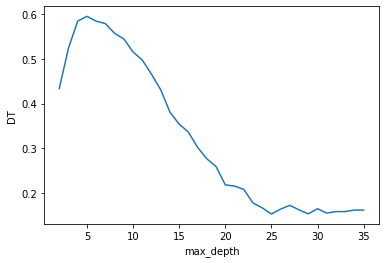

In [49]:
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('DT');

###Sorting the scores

In [50]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.594703,0.60394
4,0.584005,0.582625
6,0.583899,0.614837
7,0.578489,0.626663
8,0.556723,0.644501


In [57]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_pipe_5 = make_pipeline(preprocessor,dec_tree_5)
dec_pipe_5.fit(X_train, y_train)
train_5_score = dec_pipe_5.score(X_train, y_train)
test_5_score = dec_pipe_5.score(X_test, y_test)

print(train_5_score)
print(test_5_score)

0.6039395395685383
0.5947031157793665


Compare the performance of your model based on rmse.

In [60]:
# Must find MSE inorder to find MSE

train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_MSE}')
print(f'Testing MSE: {test_MSE}')

Training MSE: 1302685.3616264113
Testing MSE: 1190882.7682698232


In [61]:
# Evaluate RMSE

train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'Training RMSE: {train_RMSE}')
print(f'Testing RMSE: {test_RMSE}')

Training RMSE: 1141.3524265652618
Testing RMSE: 1091.2757526261744


# Determine which model to implement.

Overall I am going with the model RMSE because RMSE is a common reporting metric for regression models. MSE also has the effect that larger errors become much larger squared errors. An error of 100 would be a squared error of 100^2 =10,000. The benefits of RMSE are that it punishes large errors. EX: MSE and is it is easier to interpret because it is expressed in the same units as the target.

I would suggest that the stakeholders put the decision tree into deployment because they performed the best when testing the data.